In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import filter_functions as ff

sns.set(style='whitegrid')

source_file = 'complaints.csv'
df = pd.read_csv(source_file,header=0)

Checking to make sure data was read in correctly. 1655777 observations and 18 variables, as expected

In [2]:
display(df)
print(df.shape)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655772,2017-03-06,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,"I have been a victim if inquiry issue,",Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,945XX,NaN,Consent provided,Web,2017-03-09,Closed with explanation,Yes,Yes,2373702
1655773,2017-03-27,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,I have disputed this debt directly with Divers...,NaN,"Diversified Consultants, Inc.",VA,232XX,NaN,Consent provided,Web,2017-03-27,Closed with explanation,Yes,No,2405925
1655774,2015-03-26,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",NaN,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who...",NaN,Finance of America Mortgage LLC,CA,925XX,NaN,Consent provided,Web,2015-03-26,Closed with monetary relief,Yes,No,1303324
1655775,2015-12-12,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,I can not get from chase who services my mortg...,NaN,JPMORGAN CHASE & CO.,NY,110XX,NaN,Consent provided,Web,2015-12-12,Closed with explanation,Yes,No,1694674


(1655777, 18)


Subsetting data in order to see only complaints related to Encore Capital Group. There are 13,428 complaints about Encore Capital Group in the Consumer Financial Protection Bureau database as of 7/1/2020.

In [3]:
encore_data = df.loc[df['Company'] == "ENCORE CAPITAL GROUP INC.",:].copy()
encore_data.shape

(13428, 18)

There are missing values present in the consumer complaints related to Encore Capital Group. The counts of missing values by column are shown below.

In [5]:
encore_data.isna().sum().to_frame('Missing Values')

,Missing Values
Date received,0
Product,0
Sub-product,290
Issue,0
Sub-issue,312
Consumer complaint narrative,8825
Company public response,13393
Company,0
State,150
ZIP code,1256


Changing Date recieved data type to datetime data.

In [7]:
encore_data['Date received'] = pd.to_datetime(encore_data['Date received'], errors='coerce')

&nbsp;&nbsp;&nbsp;&nbsp;There is an irregularity in the number of consumer complaints about Encore Capital Group. Initially there is a low amount of complaints which spikes up in 2014 after which there appears to be an overall downward trend. An anomaly which occurs in 2020 is due to the fact that at the time of this report, it was only part way through the year (July 2020) so there are less complaints than expected. It would be interesting to see if the coronavirus-19 pandemic will have affected the number of complaints by the end of the year.

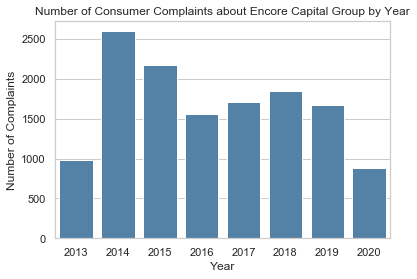

In [27]:
sns.countplot(x=encore_data['Date received'].dt.year,color='steelblue')
plt.ylabel('Number of Complaints')
plt.xlabel('Year')
plt.title('Number of Consumer Complaints about Encore Capital Group by Year')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;The states with the most complaints are California, Florida, Texas, New York and Georgia in that order. They may receive the most complaints because they are states with large populations and it is likely that encore Capital Group purchases a large amount of debt from consumers in those states. The plot below shows how complaints in these states have changed over time. There appears to be a spike in complaints in the years 2014 and 2015, followed by a sharp drop in complaints in California, Texas, and New York. Florida showed a slight increasing trend after 2016. Georgia did not show a well defined trend. Again it is important to note the year 2020 only shows the number of complaints filed through July 2020.

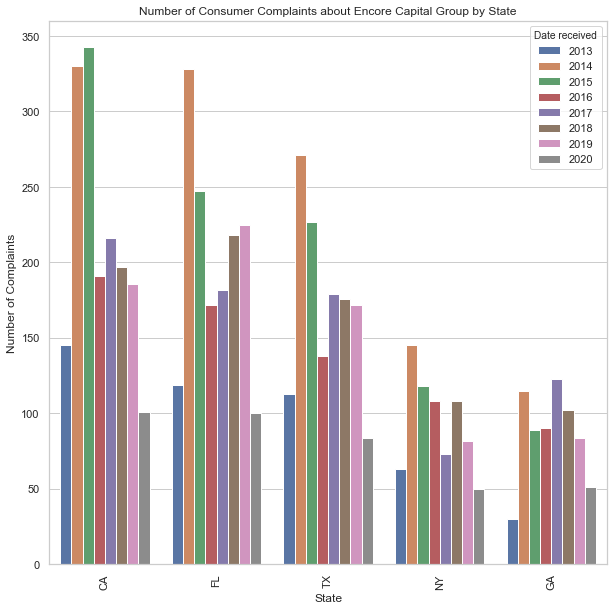

In [29]:
top_five_states = encore_data['State'].value_counts()[0:5].index.values

plt.figure(figsize=(10,10))
sns.countplot(x='State',data=encore_data.query('`State` in @top_five_states'),
              hue= encore_data.query('`State` in @top_five_states')['Date received'].dt.year,
             order=top_five_states)
plt.xticks(rotation=90)
plt.ylabel('Number of Complaints')
plt.title('Number of Consumer Complaints about Encore Capital Group by State')
plt.show()

There are multiple redundant product values which need to be changed to one or the other (i.e. both Credit card and Credit Card or prepaid card can just be counted as Credit Card or prepaid card)

In [13]:
encore_data.replace({'Product':{"Checking or savings account":"Bank account or service",
                                "Credit card":"Credit card or prepaid card",
                               "Credit reporting":"Credit reporting, credit repair services, or other personal consumer reports",
                               "Mortgage":"Consumer Loan",
                                "Payday loan":"Consumer Loan",
                                "Payday loan, title loan, or personal loan":"Consumer Loan",
                               "Prepaid card":"Credit card or prepaid card",
                               "Student loan":"Consumer Loan",
                               "Vehicle loan or lease":"Consumer Loan"}},inplace=True)

A great majority of the complaints since 2013 have been about debt collection. The second most common complaint is about credit reporting,
credit repair services and other personal consumer reports. The third and fourth most common complaints are about credit cards/prepaid cards and bank account or service, respectively. All other categories of complaints are uncommon.

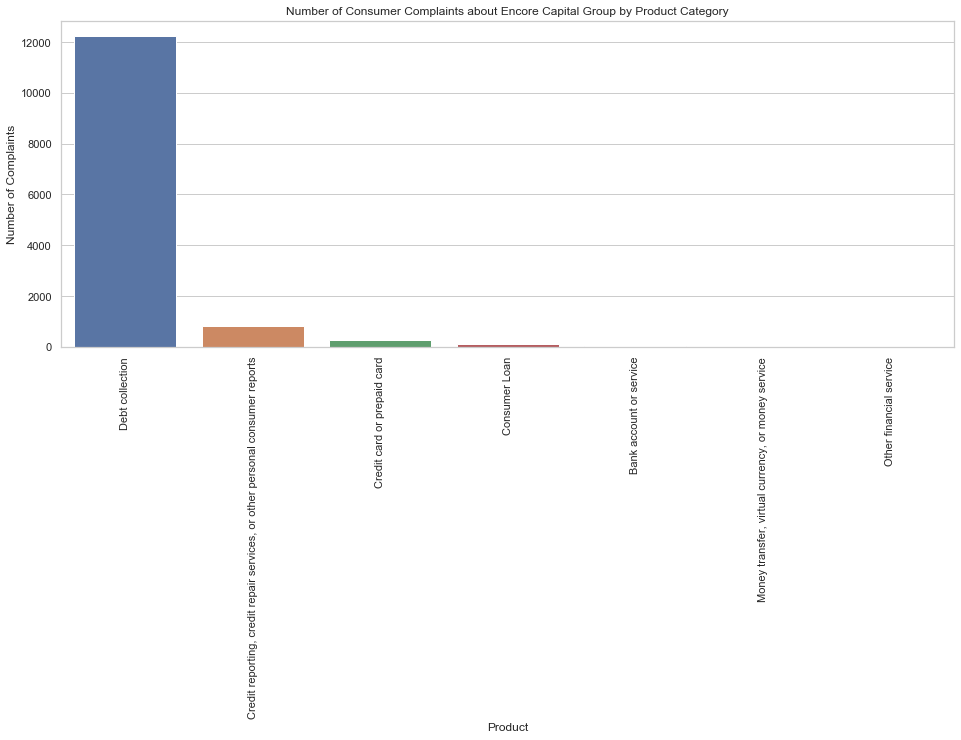

In [28]:
plt.figure(figsize=(16,6))
sns.countplot(x='Product',data=encore_data)
plt.xticks(rotation=90)
plt.ylabel("Number of Complaints")
plt.title('Number of Consumer Complaints about Encore Capital Group by Product Category')
plt.show()

Creating month and year columns.

In [15]:
encore_data['month'] = encore_data['Date received'].dt.month
encore_data['year'] = encore_data['Date received'].dt.year

While the overall number of complaints has been decreasing over time, the proportion of complaints about credit reporting services has been increasing in the last few years. This suggests that Encore Capital Group is handling issues related to debt collection better.

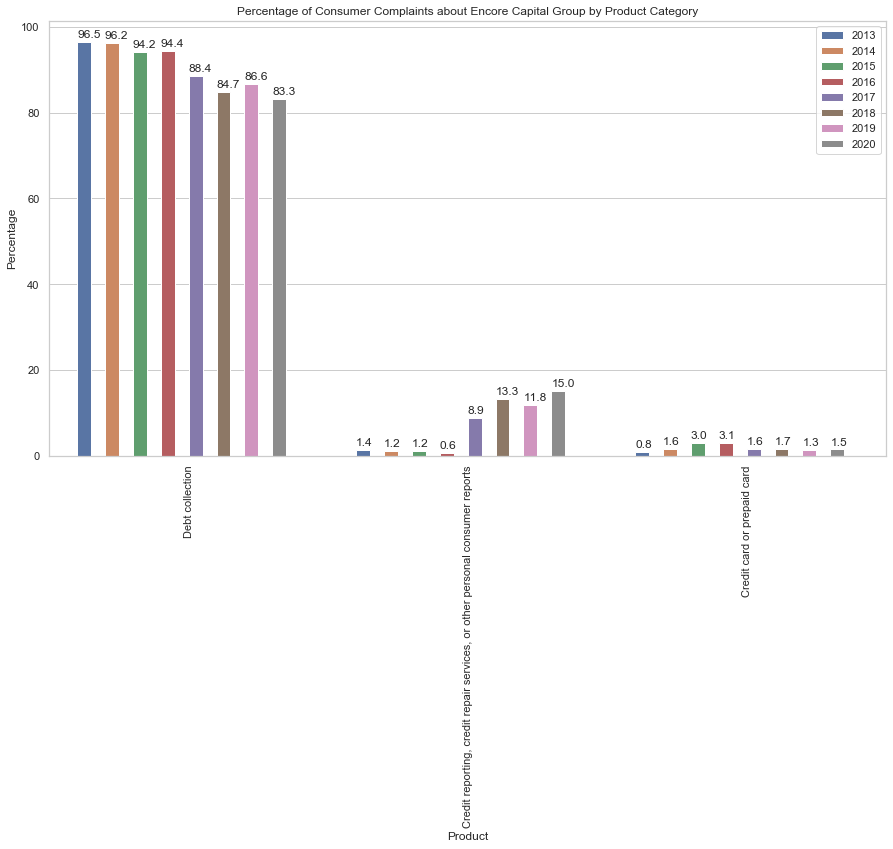

In [17]:
encore_product_props = encore_data.groupby(encore_data['Date received'].dt.year)['Product'].value_counts(normalize=True).rename("Percentage").mul(100)

encore_product_props = encore_product_props[(encore_product_props.index.get_level_values(1) != "Consumer Loan") &
                     (encore_product_props.index.get_level_values(1) != "Money transfer, virtual currency, or money service") &
                     (encore_product_props.index.get_level_values(1) != "Other financial service") &
                    (encore_product_props.index.get_level_values(1) != "Bank account or service")]

plt.figure(figsize=(15,8))
ax = sns.barplot(x=encore_product_props.index.get_level_values(1),y=encore_product_props,
             hue=encore_product_props.index.get_level_values(0))
plt.xticks(rotation=90)
plt.legend(loc = "upper right")
plt.title('Percentage of Consumer Complaints about Encore Capital Group by Product Category')

for p in ax.patches:
    p.set_width(.05)
    ax.annotate('{:.1f}'.format(p.get_height()),
                (p.get_x(),p.get_height()+1))

Since 2013, the most common issues were that the consumer felt there was not enough information to verify the debt, the debt did not belong to the consumer or was already paid off/no longer owed,the communication tactics, and threats or illegal actions.

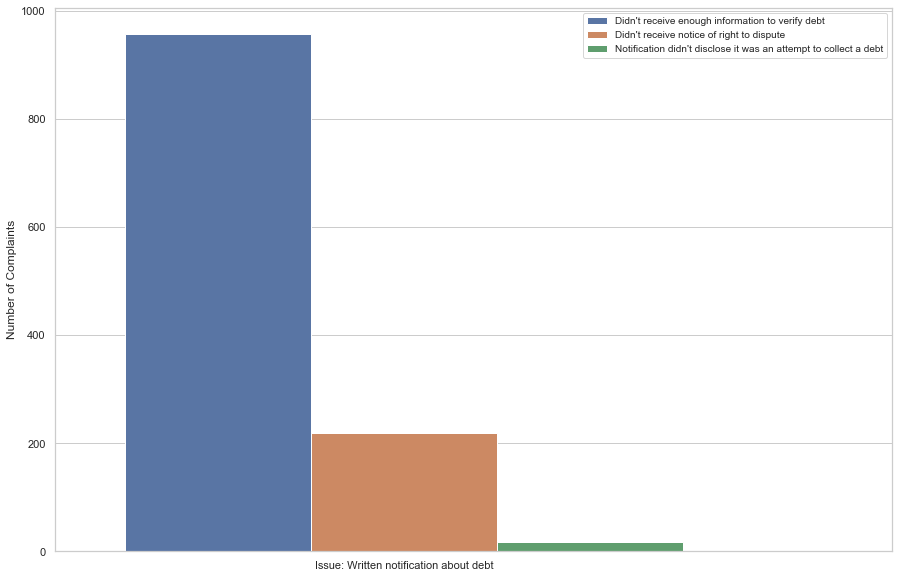

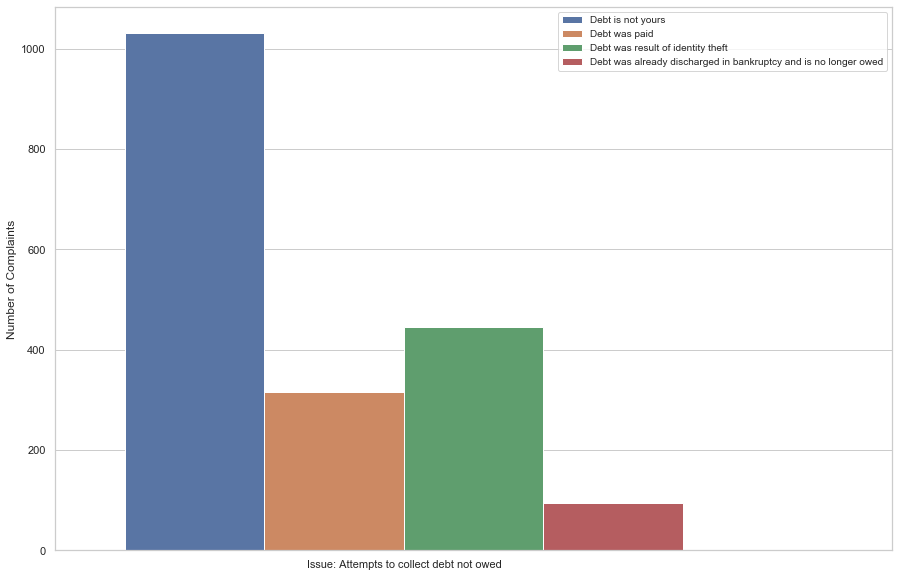

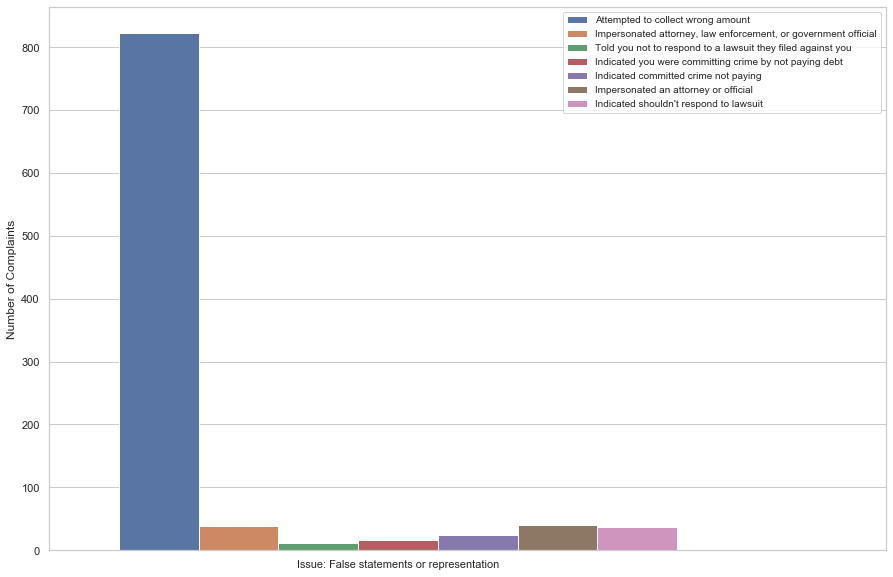

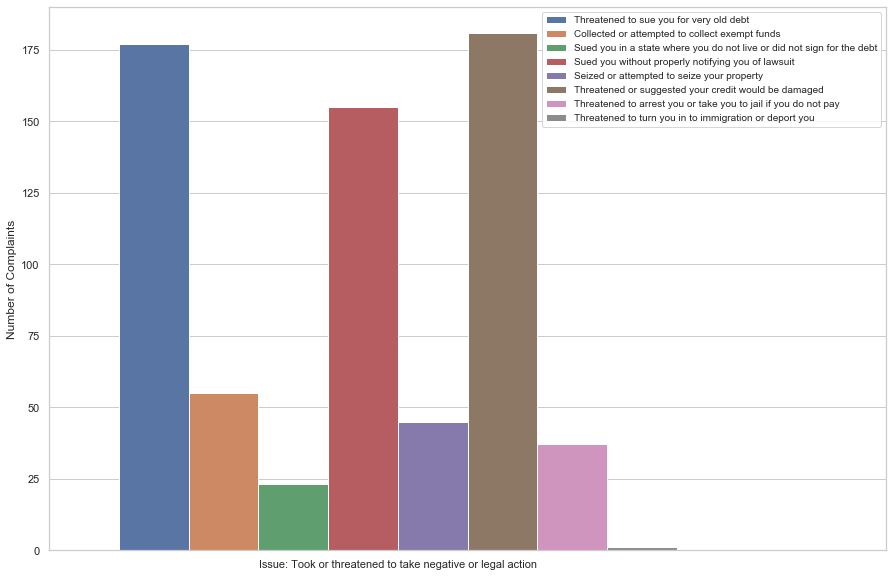

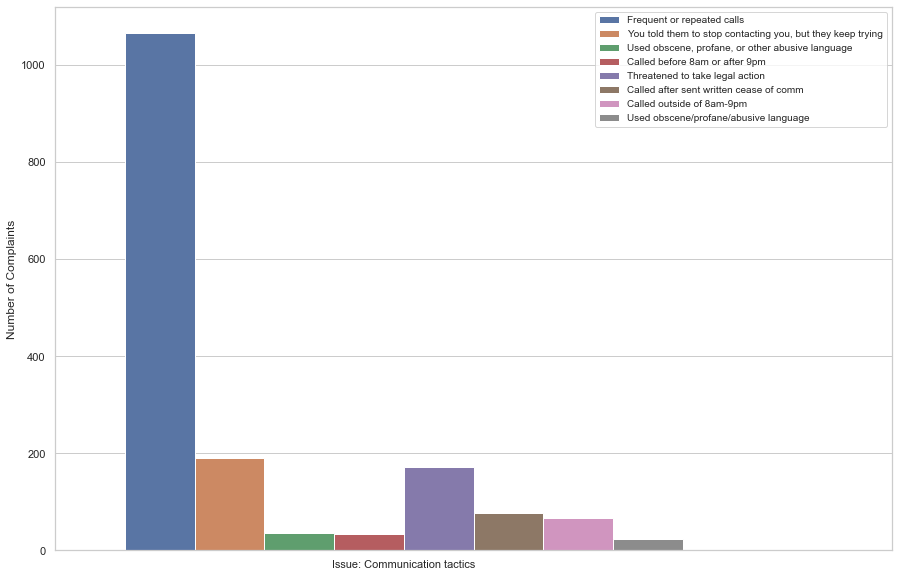

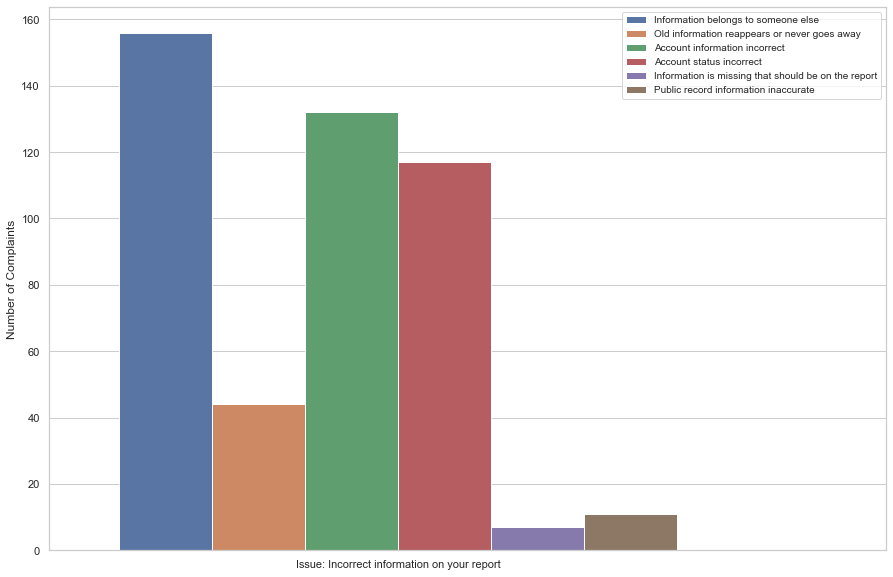

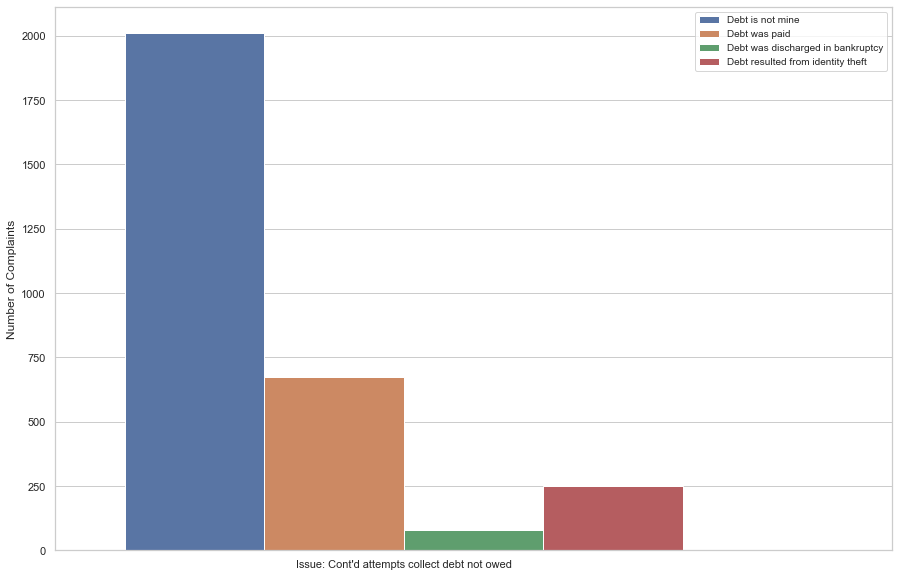

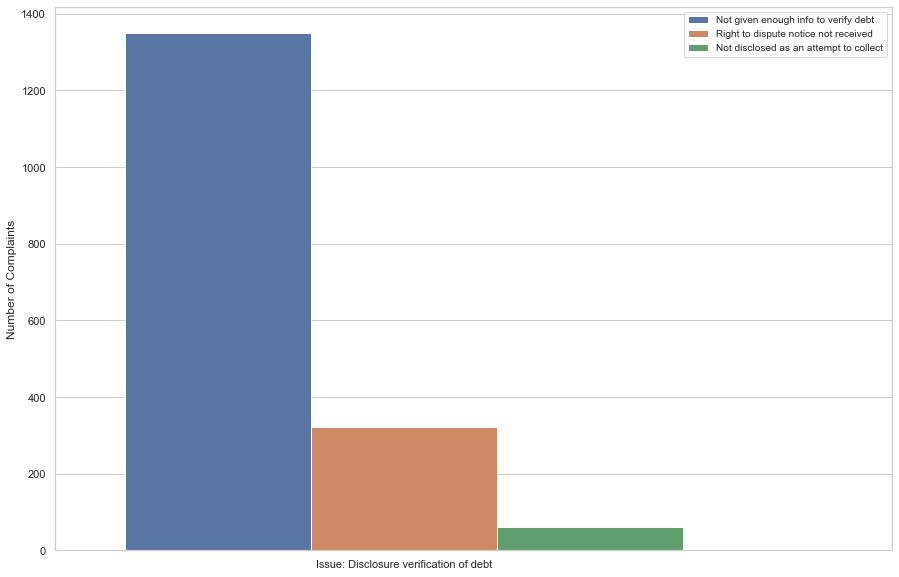

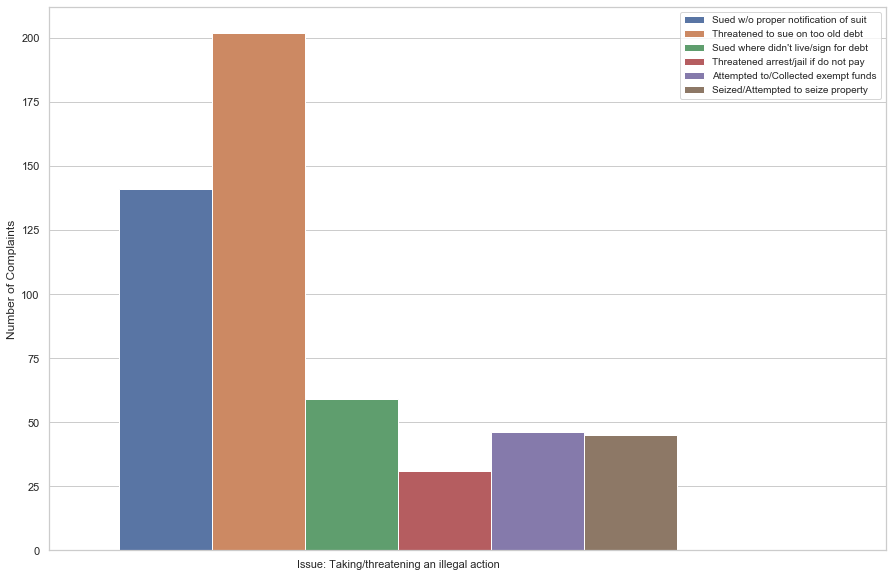

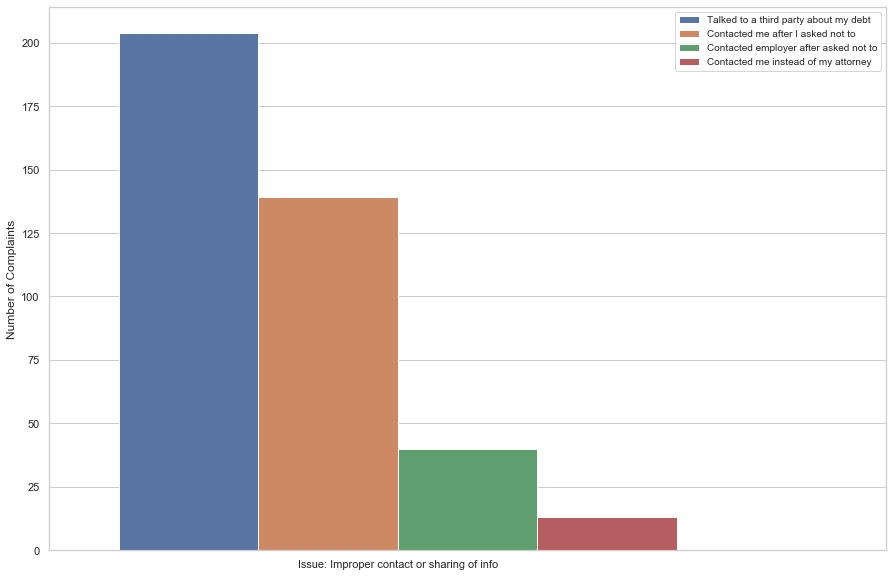

In [30]:
common_issues=['Written notification about debt','Attempts to collect debt not owed',
              'False statements or representation','Took or threatened to take negative or legal action',
              'Communication tactics','Incorrect information on your report',
              "Cont'd attempts collect debt not owed","Disclosure verification of debt",
              "Taking/threatening an illegal action","Improper contact or sharing of info"]

for i in common_issues:
    ff.filtered_grouped_countplot(encore_data,'Issue',
                           i,
                          'Sub-issue',figsize=(15,10),legend_size=10,xrange=(-0.5,0.7))
    

Creating a subset of recent recent complaints (from 2019 and 2020)

In [18]:
encore_data_recent = encore_data.loc[(encore_data['Date received'].dt.year == 2019) | (encore_data['Date received'].dt.year == 2020),:].copy()

The majority of the complaints in 2019 and 2020 were about debt collection.

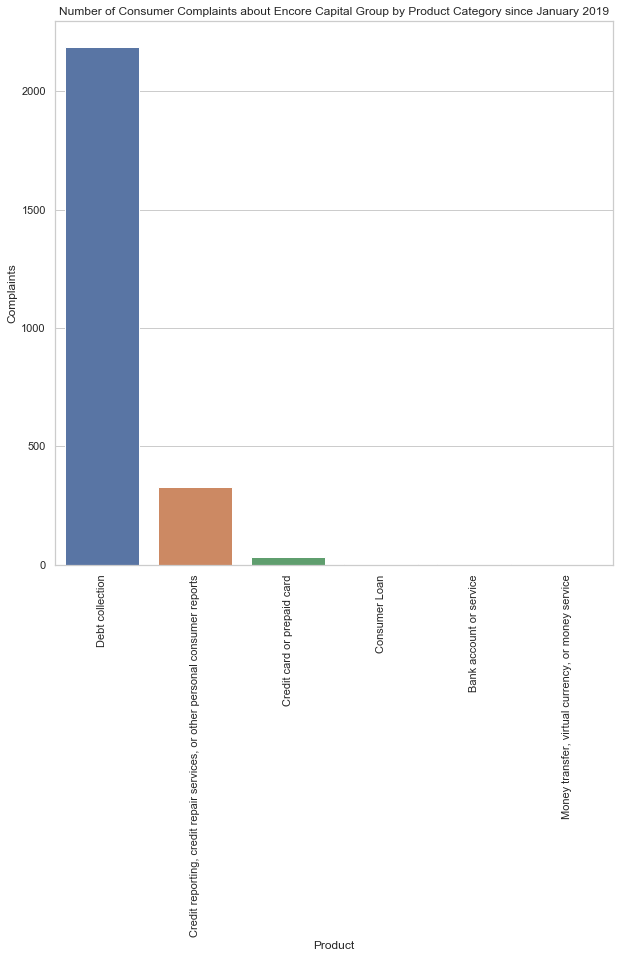

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x='Product',data=encore_data_recent)
plt.xticks(rotation=90)
plt.title('Number of Consumer Complaints about Encore Capital Group by Product Category since January 2019')
plt.ylabel('Complaints')
plt.show()

Top issues in recent years have included:<br/> 
Consumers didn't receive enough information to verify debt<br/> 
The debt did not belong to the consumer or was already discharged<br/>
Communication tactics<br/>
Incorrect information on report<br/>
<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Because of the nature of the business, people may file complaints even when the company is acting well within its legal rights. However, Encore Capital Group can improve its practices by providing more information to verify debts, making sure the information is correct and also giving a more detailed report on how the total amount due was calculated. According to the Consumer Financial Protection Bureau, it is common for consumers to wrongly complain of debt collectors trying to collect the wrong amount when they simply do not understand how the amount due was calculated. Displaying a detailed report on how the total amount due was calculated could ease the collection process.

Potential legal issues included:<br/>
Consumer didnt receive a notice of the right to dispute<br/>
Making false statements or representation<br/>
Threatening to take legal action

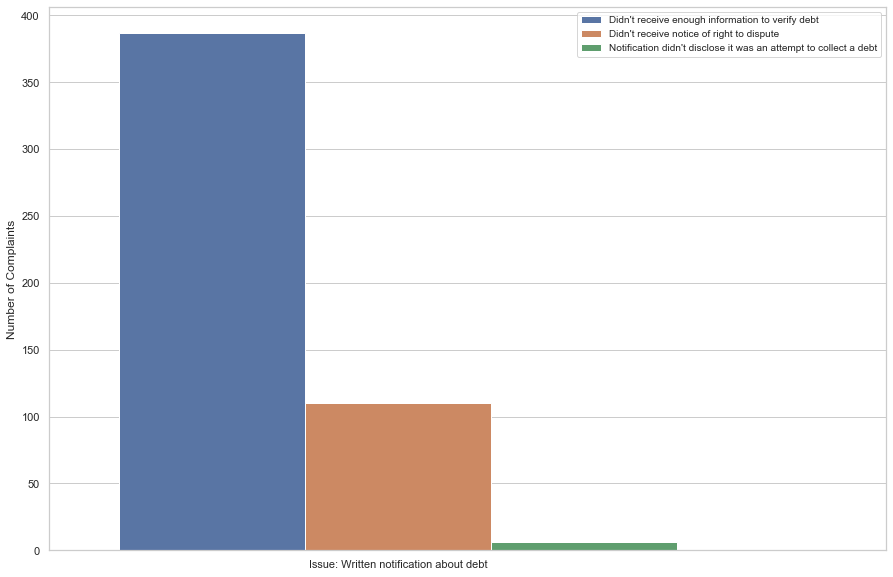

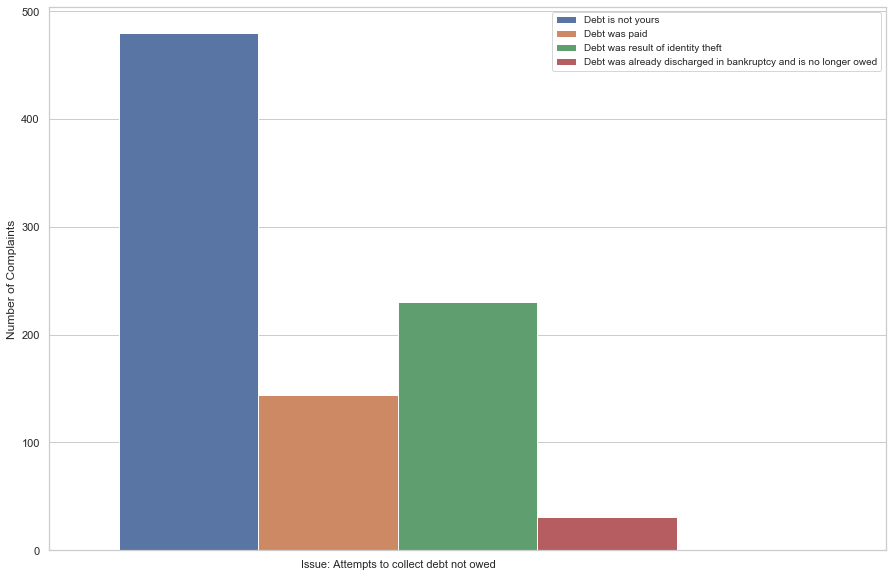

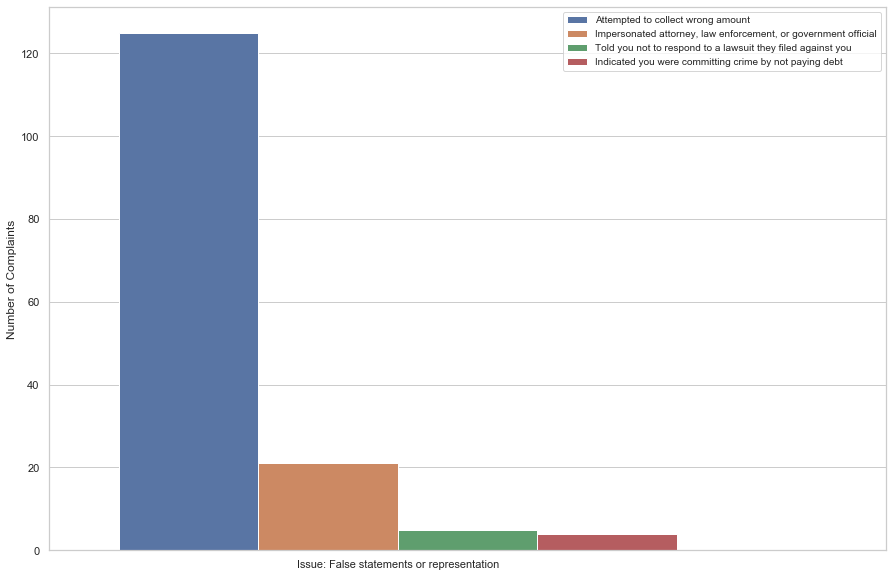

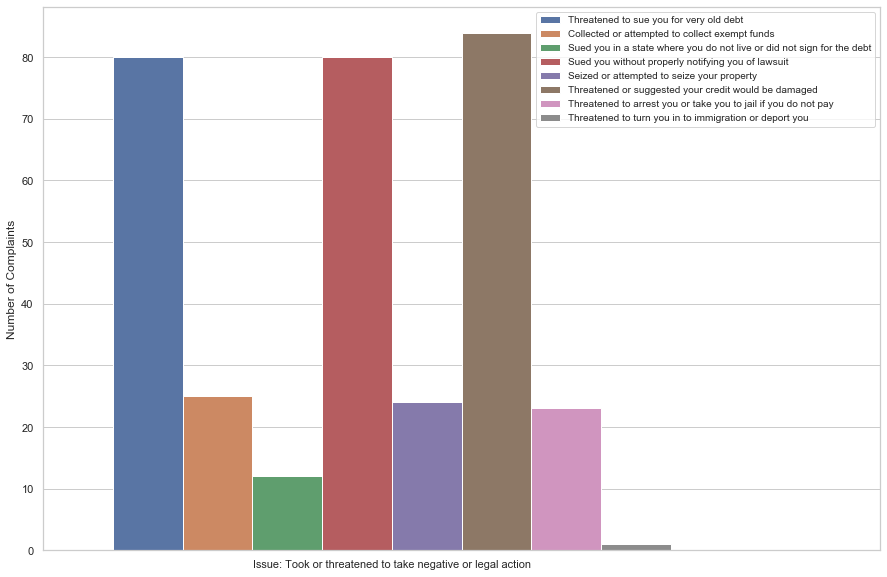

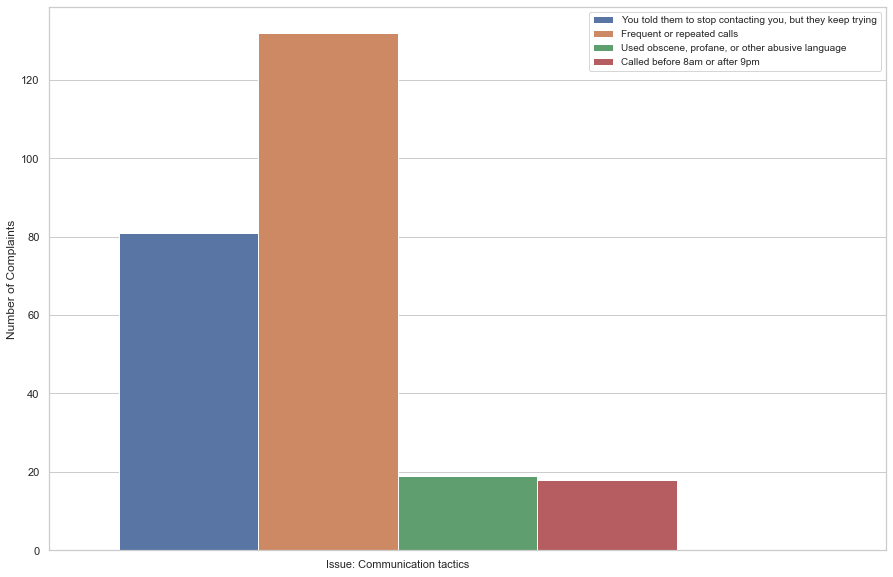

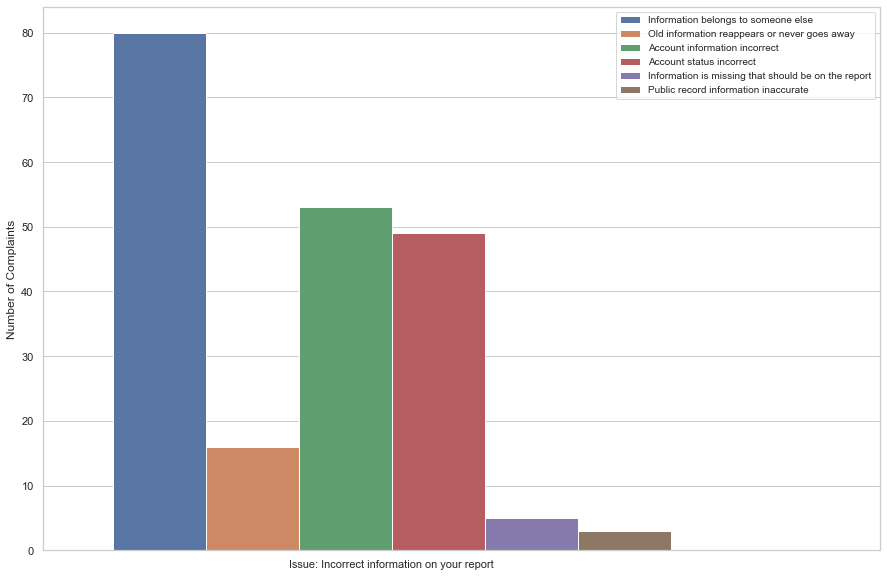

In [31]:
recent_common_issues = ['Written notification about debt','Attempts to collect debt not owed',
                        'False statements or representation','Took or threatened to take negative or legal action',
                       'Communication tactics','Incorrect information on your report']

for i in recent_common_issues:
    ff.filtered_grouped_countplot(encore_data_recent,'Issue',
                           i,
                          'Sub-issue',
                                  figsize=(15,10),legend_size=10,xrange=(-0.5,0.7))

&nbsp;&nbsp;&nbsp;&nbsp;About 10% of recent consumer complaints (from 2019 and 2020) were about legal issues. This is a serious problem if these
accusations are true, since a violation of the Fair Debt Collections Practices Act can lead to a countersuit from the consumer. Since many observations did not have complete zip codes, data was aggregated into the first three digits of zip codes. The 3 digit zip codes with more than three complaints about illegal practices are shown below along with the state that they correspond to. Two of the zip codes listed are Florida zip codes, so there may be more problems with the branch that is managing accounts in that area. It is in the companies' best interest to investigate which employees are responsible for overseeing accounts in those corresponding areas and to make sure they understand the rules listed in the Fair Debt Collections Practices Act.

In [23]:
legal_issues = ['Didnt recieve notice of right to dispute',
                'Impersonated attorney, law enforcement, or government official','Threatened to sue you for very old debt',
               'Collected or attempted to collect exempt funds',
                'Sued you in a state where you do not live or did not sign for the debt',
               'Sued you without properly notifying you of lawsuit',
                'Threatened to arrest you or take you to jail if you do not pay',
               'Threatened to turn you in to immigration or deport you',
                'You told them to stop contacting you but they keep trying',
               'Called before 8am or after 9pm']


encore_data_recent['Sub_issue'] = encore_data_recent['Sub-issue']
encore_data_recent.drop('Sub-issue',axis=1)
encore_data['Sub_issue'] = encore_data_recent['Sub-issue']
encore_data.drop('Sub-issue',axis=1)

encore_recent_legal = encore_data_recent.query('`Sub_issue` in @legal_issues').copy()

encore_recent_legal['three_digit_ZIP_code'] = "NaN"
for i in encore_recent_legal.index:
    encore_recent_legal.loc[i,'three_digit_ZIP_code'] = str(encore_recent_legal.loc[i,'ZIP code'])[0:3]
    
top_zip_codes = encore_recent_legal['three_digit_ZIP_code'].value_counts()[1:8].index.values
top_zip_legal = encore_recent_legal.query("three_digit_ZIP_code in @top_zip_codes")
top_zip_legal.groupby(['three_digit_ZIP_code']).apply(lambda x: x['State'].unique()[0])
top_zip_groups = top_zip_legal.groupby(['three_digit_ZIP_code']).apply(lambda x: x['State'].unique()[0])
display(pd.DataFrame({"3 Digit Zip Code":top_zip_groups.index.values,"State":top_zip_groups.values}))

,3 Digit Zip Code,State
0,087,NJ
1,191,PA
2,212,MD
3,300,GA
4,330,FL
5,331,FL
6,482,MI


Only the years 2019 and 2020 are shown for common complaints related to possible legal issues. That is because prior to 2019 there were no such complaints. This should be of concern to Encore Capital Group because it indicates that there are possible violations of the Fair Debt Collections Practices occuring in recent times when it was not common at all before or at least people were not filing complaints before. It could also be due to the way that the Consumer Financial Protection Bureau recorded complaints at the time. It is also important to note that the data only goes as far as July 2020, therefore the 2020 values seem lower than they would be by the end of the year.

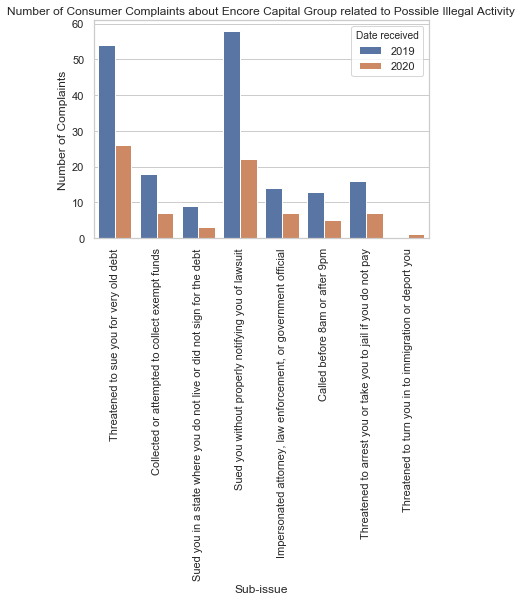

In [32]:
sns.countplot(x='Sub_issue',data=encore_data.query('`Sub_issue` in @legal_issues'),
              hue= encore_data.query('`Sub_issue` in @legal_issues')['Date received'].dt.year)
plt.xticks(rotation=90)
plt.xlabel("Sub-issue")
plt.ylabel('Number of Complaints')
plt.title('Number of Consumer Complaints about Encore Capital Group related to Possible Illegal Activity')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;The bar graph below shows that Encore Captial Group does a good job of responding to consumer complaints. Only a single complaint was closed without relief or an explanation in 2016, whereas companies on average respond to approximately 96% of complaints. It is important to note that "closed with non-monetary relief" means that the steps taken by Encore Capital Group may have addressed some or all of the consumer's complaint involving non-monetary requests without resulting in monetary relief. The graph below shows that many complaints are resolved with an explanation. An improvement that could be made would be to clarify the debt collection process when contacting consumers.

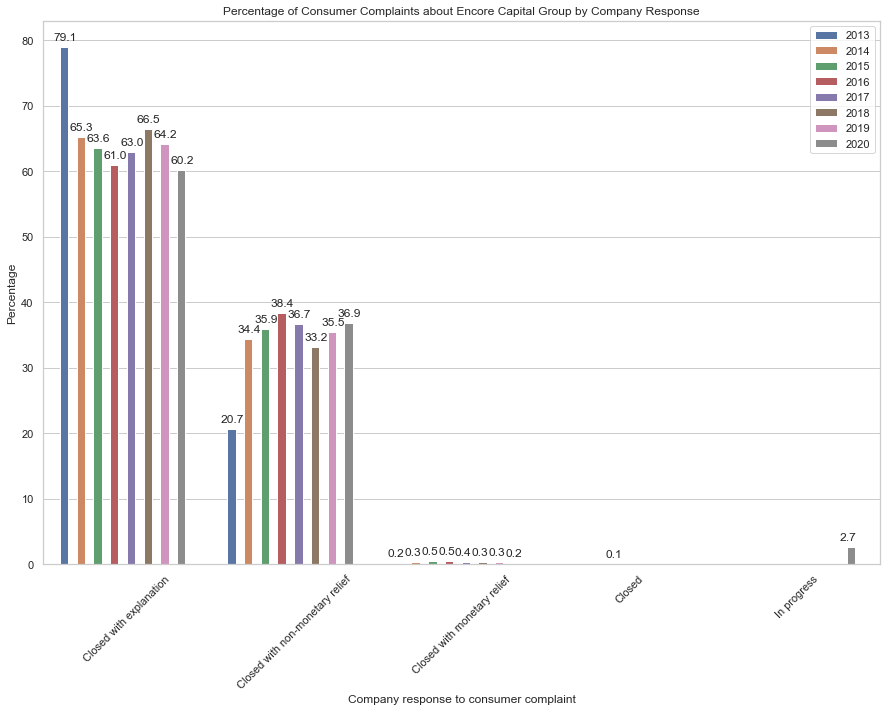

In [26]:
company_responses = encore_data.groupby(encore_data['Date received'].dt.year)['Company response to consumer'].value_counts(normalize=True).mul(100).rename("percentage")
plt.figure(figsize=(15,10))
ax = sns.barplot(x=company_responses.index.get_level_values(1),y=company_responses,
                 hue=company_responses.index.get_level_values(0))
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.legend(loc='upper right')
plt.xlabel('Company response to consumer complaint')
plt.title('Percentage of Consumer Complaints about Encore Capital Group by Company Response')

for p in ax.patches:
    p.set_width(.05)
    ax.annotate('{:.1f}'.format(p.get_height()),
                (p.get_x()-0.04,p.get_height()+1))
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;The analysis contained within this document suggests that Encore Capital Group has done a great job of responding to consumer complaints filed with the Consumer Financial Protection Bureau (better than the industry average of 96%). The most common complaint was about debt collection, but since 2014 there appears to have been a somewhat irregular downward trend in the number of complaints per year. The company could continue to reduce the number of complaints by maintaining accurate records and giving consumers a more detailed report with:<br/>
Enough information to verify debts<br/>
Detailed explanations showing how amount due was calculated<br/>
A clear notification that Encore Capital Group is attempting to collect payment<br/>
<br/>
&nbsp;&nbsp;&nbsp;&nbsp;In recent years there has been an increase in the number of complaints about Encore Capital Group engaging in illegal practices. These complaints are most common in New Jersey, Pennsylvania, Maryland, Georgia, Florida and Michigan. It is crucial that employees overseeing accounts in these areas understand the rules listed in the Fair Debt Collections Practices Act so that the company can avoid being sued by consumers.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;One final improvement that could be made would be to give consumers the option to select multiple complaint issues. In this way, consumers wouldn't be forced to select a single issue and Encore Capital Group could get more complete information in order to better serve customers. Note that the data comes from the Consumer Financial Protection Bureau, but Encore Capital Group can obtain additional information from customers when it reaches out to them in response to a complaint. A NoSQL database such as mongoDB could be used to implement such a system in order to store multiple complaints per consumer in an efficent way.